<a href="https://colab.research.google.com/github/kairamilanifitria/PurpleBox-Intern/blob/main/02_04_2025_scanned_form_pdf_text_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ocr-only

### tesseract

In [ ]:
!sudo apt install tesseract-ocr  # Debian/Ubuntu
!brew install tesseract  # macOS

In [ ]:
pip install pytesseract opencv-python Pillow

In [11]:
import cv2
import pytesseract
from PIL import Image

# Set Tesseract path (only needed for Windows)
# Uncomment and update the path if needed
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load the image
image_path = "/content/modello-730-2020-FERIGO-FRANCESCA.jpg"  # Update with your file path
image = cv2.imread(image_path)

# Convert to grayscale for better OCR performance
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding (optional, improves OCR on some documents)
gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Save processed image (optional, for debugging)
cv2.imwrite("processed_image.png", gray)

# Perform OCR
extracted_text = pytesseract.image_to_string(gray, lang="eng")  # Change 'eng' to 'ita' for Italian

# Print extracted text
print(extracted_text)

# Save to file
with open("output.txt", "w", encoding="utf-8") as f:
    f.write(extracted_text)


    
     
    
  

 

30706 VERON {001

‘01/09/2020: 18

 

 

 

 

 

DIGHIARAZIONE CONGIUNTA [EA]

BYUGRE CEReoe

 

 

 

 

 

 

 

 

 

 

 

 

 

COMUNE (5 State

 

 

 

 

 

 

 

 

VERONA.

c presontazione®
‘dalla dichiarazions

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

COGNOME 6 NOME 6 DENOMINAZIC
ESU_DI ‘VERONA

 

 

See
0458052811

ELLA’ DICHIARAZIONE*

 

 

 

model Ez Birsaie ia casella par richiedste di eazore Informato di

prose fassisenzsfeeie ch eventlal comuatcanionl dalfAgenaia deo Rais

eompll

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 



### easyocr

In [ ]:
pip install easyocr

In [13]:
import easyocr
import cv2

# Initialize EasyOCR reader (for English + Italian)
reader = easyocr.Reader(["en", "it"])

# Load image
image_path = "/content/modello-730-2020-FERIGO-FRANCESCA.jpg"
image = cv2.imread(image_path)

# Perform OCR
results = reader.readtext(image, detail=0)

# Print extracted text
for text in results:
    print(text)

# Save output to file
with open("easyocr_output.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(results))


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteFERIGO FRANCESCA
MODELLO 730/2020
ntrate
80
Redditi 2019
ELABORATO
CONTRIBUENTE
DICHIARANTE
X conIUGE DiChIARANTE
DICHIARAZIONE CONGIUNTA
BEFEESEYEAEEE
CODICE FISCALE DEL CONTRIBUENTE   {obbligatono)
Scgpet8
Crcoca
'Inente  (vE2eic'
itsia2in))
sossenz?
siyazioniQuadro K
CODICE FISCALE (rppresantanle
Llore
erede)
particolari
FRGFNC7OB63L781I
COGNOME (per le donne indicare
cognome da nubile)
MOME
SESSO (M 0 F}
DATI DEL
FERIGO
ERANCESCA
CONTRIBUENTE
DATA DI NASCITA
COMUNE (0 Stalo estero)
DI NASCITA
PAOVINCIA
sigla)
TUTELATOA Mloae ceceduto'a
OuNo
23
02
1970
VERONA
VR
RESIDENZA
COMUNE
PROVINCIA (sigla)
CAP
ANAGRAFICA
Da compilare solo
TIPCLCGIA (Viz
Piazza, ecc.)
INDIRIZZO
NUM CIvICo
se variata dal
|
dpzsegtaizoaa
FRAZIONE
DATA DELLA VARIAZIONE
della dichiarazione
Gioaro
Mese
ANC
Pochiapizione nra sentata
orutin
TELEFONO E
TELEFONO
CELLULARE
INDIAIZZO DI POSTA ELETTRONICA
POSTA
Pfehisso
Niikicao
ELETTRONICA
DOMI

### paddleocr (best practice)

In [ ]:
!pip install paddleocr
!pip install paddlepaddle

In [16]:
from paddleocr import PaddleOCR

# Initialize PaddleOCR
ocr = PaddleOCR(lang="en")

# Run OCR
results = ocr.ocr("/content/modello-730-2020-FERIGO-FRANCESCA.jpg", cls=True)

# Extract text
extracted_text = []
for result in results[0]:
    extracted_text.append(result[1][0])

# Print extracted text
print("\n".join(extracted_text))

# Save output
with open("paddleocr_output.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(extracted_text))


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:16<00:00, 230.43it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:17<00:00, 576.17it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:14<00:00, 149.83it/s]

[2025/02/04 04:52:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

[2025/02/04 04:52:08] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/02/04 04:52:09] ppocr DEBUG: dt_boxes num : 160, elapsed : 0.4433739185333252
[2025/02/04 04:52:23] ppocr DEBUG: rec_res num  : 160, elapsed : 14.220921754837036
FERIGO FRANCESCA
30
MODELLO730/2020
BntrateQ
trate
Redditi2019
ELABORATO
Mod.N.
CONTRIBUENTE
BAPRESENTAEDE
DICHIARANTEX CONIUGE DICHIARANTE
DICHIARAZIONE CONGIUNTA
CODICE FISCALEDELCONTBUENTE obbligatoriSoggecaente  iner
730 Qukapprr
FRGFNC70B63L781I
COGNOME (per le donne indicare icognome da nubile
NOME
SESSO (MF)
DATIDEL
FERIGO
FRANCESCA
F
CONTRIBUENTE
DATA DI NASCITA
COMUNE (o Stato estero DI NASCITA
0123
02
1970
VERONA
VR
COMUNE
RESIDENZA
PROVINCIA (sigla) C.A.P.
ANAGRAFICA
Da compilare solo
TIPOLOGIA (Via.piazzaecc.
INDIRIZZO
NUM.CIVICO
di presentazione
FRAZIONE
DATA DELLA VARIAZIONE
della dichiarazione
Dichiarazione preser
TELEFONO E
TELEFONO
CELLULARE
INDIRIZZO DI POSTA ELETTRONICA
POS

## LM model approach (all failed)

### colpali -> FAILED

In [ ]:
!pip install -q -U huggingface_hub
from huggingface_hub import login

login()

In [ ]:
!pip install -q -U "colpali-engine[interpretability]>=0.3.2,<0.4.0"

In [3]:
import pprint
from io import BytesIO
from pathlib import Path
from typing import Optional, cast

import matplotlib.pyplot as plt
import requests
import torch
from colpali_engine.interpretability import (
    get_similarity_maps_from_embeddings,
    plot_all_similarity_maps,
    plot_similarity_map,
)
from colpali_engine.models import ColPali, ColPaliProcessor
from colpali_engine.utils.torch_utils import get_torch_device
from PIL import Image

In [4]:
def load_image_from_url(url: str) -> Image.Image:
    """
    Load a PIL image from a valid URL.
    """
    response = requests.get(url)
    return Image.open(BytesIO(response.content))


def scale_image(image: Image.Image, new_height: int = 1024) -> Image.Image:
    """
    Scale an image to a new height while maintaining the aspect ratio.
    """
    # Calculate the scaling factor
    width, height = image.size
    aspect_ratio = width / height
    new_width = int(new_height * aspect_ratio)

    # Resize the image
    scaled_image = image.resize((new_width, new_height))

    return scaled_image

In [5]:
model_name = "vidore/colpali-v1.2"

device = get_torch_device("auto")
print(f"Using device: {device}")

# Load the model
model = cast(
    ColPali,
    ColPali.from_pretrained(
        model_name,
        torch_dtype=torch.bfloat16,
        device_map=device,
    ),
).eval()

# Load the processor
processor = cast(ColPaliProcessor, ColPaliProcessor.from_pretrained(model_name))

Using device: cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

In [ ]:
# Preprocess inputs
batch_images = processor.process_images([image]).to(device)
batch_queries = processor.process_queries([query]).to(device)

# Forward passes
with torch.no_grad():
    image_embeddings = model.forward(**batch_images)
    query_embeddings = model.forward(**batch_queries)

In [ ]:
# Get the number of image patches
n_patches = processor.get_n_patches(image_size=image.size, patch_size=model.patch_size)

print(f"Number of image patches: {n_patches}")

# Get the tensor mask to filter out the embeddings that are not related to the image
image_mask = processor.get_image_mask(batch_images)

In [ ]:
# Generate the similarity maps
batched_similarity_maps = get_similarity_maps_from_embeddings(
    image_embeddings=image_embeddings,
    query_embeddings=query_embeddings,
    n_patches=n_patches,
    image_mask=image_mask,
)

# Get the similarity map for our (only) input image
similarity_maps = batched_similarity_maps[0]  # (query_length, n_patches_x, n_patches_y)

print(f"Similarity map shape: (query_length, n_patches_x, n_patches_y) = {tuple(similarity_maps.shape)}")

### layoutLM -> FAILED

In [ ]:
pip install transformers torch torchvision pytesseract tesseract-ocr

In [ ]:
from transformers import LayoutLMv3Processor, LayoutLMv3ForTokenClassification
from PIL import Image

# Load processor and model
processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-base")
model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base")

In [5]:
# Load document image
image = Image.open("/content/modello-730-2020-FERIGO-FRANCESCA.jpg")

# Preprocess image
encoding = processor(image, return_tensors="pt", max_length=512, truncation=True) # Added max_length and truncation

# Predict
outputs = model(**encoding)
logits = outputs.logits  # Raw model output

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1113: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [7]:
import torch # Import the torch module
# Convert logits to class labels
predicted_class_ids = torch.argmax(logits, dim=-1)  # Get highest confidence label
predicted_labels = [model.config.id2label[idx.item()] for idx in predicted_class_ids[0]]

# Extract tokens
tokens = processor.tokenizer.convert_ids_to_tokens(encoding["input_ids"][0])

# Combine tokens with their labels
for token, label in zip(tokens, predicted_labels):
    print(f"{token}: {label}")

<s>: LABEL_1
ĠFR: LABEL_0
GF: LABEL_0
NC: LABEL_0
70: LABEL_0
B: LABEL_0
63: LABEL_0
L: LABEL_0
78: LABEL_0
11: LABEL_0
Ġ01: LABEL_0
/: LABEL_0
09: LABEL_0
/: LABEL_0
2020: LABEL_0
Ġ18: LABEL_0
:: LABEL_1
30: LABEL_0
:: LABEL_1
06: LABEL_0
ĠVER: LABEL_0
ON: LABEL_0
Ġ00: LABEL_1
1: LABEL_0
Ġre: LABEL_0
ĠFR: LABEL_0
GEN: LABEL_0
Ġ|: LABEL_0
ĠB: LABEL_0
OS: LABEL_0
L: LABEL_0
IO: LABEL_0
IT: LABEL_0
Ġ_: LABEL_0
-: LABEL_0
ĠM: LABEL_0
ODE: LABEL_0
LL: LABEL_0
O: LABEL_0
Ġ7: LABEL_1
30: LABEL_0
/: LABEL_0
2020: LABEL_0
ĠE: LABEL_0
ĠReddit: LABEL_0
i: LABEL_0
Ġ2019: LABEL_0
ĠF: LABEL_0
ER: LABEL_0
IG: LABEL_0
O: LABEL_0
ĠFR: LABEL_0
ANC: LABEL_0
ES: LABEL_1
CA: LABEL_0
ĠEL: LABEL_0
AB: LABEL_0
OR: LABEL_0
AT: LABEL_0
O: LABEL_0
ĠMod: LABEL_0
.: LABEL_0
N: LABEL_0
.: LABEL_0
Ġ[: LABEL_0
ĠâĢ: LABEL_0
ľ: LABEL_0
ĠCONTR: LABEL_0
IB: LABEL_0
U: LABEL_0
ENT: LABEL_0
E: LABEL_0
ĠD: LABEL_0
IGH: LABEL_0
I: LABEL_0
AR: LABEL_0
ANT: LABEL_0
E: LABEL_0
Ġ|: LABEL_0
ĠD: LABEL_0
ICH: LABEL_0
IA: LABEL_1
F

## advanced OCR (best practice)

### WORKS : experiment for storing OCR data from scanned page, show the related page when keyword are matched
fix : **paddle ocr** + **yolo ocr** + **pdf2image**

In [ ]:
!pip install ultralytics paddleocr opencv-python paddlepaddle pdf2image
!apt-get install poppler-utils

In [6]:
import cv2
import pandas as pd
import os
import gc
from ultralytics import YOLO
from paddleocr import PaddleOCR
from pdf2image import convert_from_path
from IPython.display import display, HTML
from PIL import Image
import io
import numpy as np # Import numpy
import base64  # Import the base64 module


# Initialize YOLO OCR model
model = YOLO("yolov8x")
ocr = PaddleOCR(lang="en")

# Define CSV file path
csv_path = "/content/extracted_text.csv"

# Load existing data if available
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
else:
    df = pd.DataFrame(columns=["page_number", "text"])  # Remove image_path column

def process_pdf(pdf_path):
    """Convert PDF pages to images and extract text while managing memory efficiently."""
    global df

    for page_number, image in enumerate(convert_from_path(pdf_path, poppler_path="/usr/bin"), start=1):
        # Convert PIL Image to NumPy array
        image_cv = np.array(image)

        # Convert RGB to BGR
        image_cv = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR)

        results = model(image_cv)  # Detect text regions

        data = []
        for result in results[0].boxes.xyxy:
            x1, y1, x2, y2 = map(int, result)
            cropped_img = image_cv[y1:y2, x1:x2].copy()

            ocr_result = ocr.ocr(cropped_img, cls=True)
            del cropped_img

            for line in ocr_result:
                for word_info in line:
                    text = word_info[1][0]  # Extract detected text
                    data.append([page_number, text])  # Store text and page number

        # Append to CSV immediately to avoid keeping large DataFrame in memory
        new_df = pd.DataFrame(data, columns=["page_number", "text"])
        new_df.to_csv(csv_path, mode="a", index=False, header=not os.path.exists(csv_path))

        del image_cv
        gc.collect()

    print("✅ PDF processing completed. Text extracted and saved.")

def search_text_and_visualize(keyword, csv_path="/content/extracted_text.csv", pdf_path="/content/modello-3page.pdf"):
    """Searches for a keyword and visualizes the related pages."""
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"Error: CSV file not found at {csv_path}")
        return

    results = df[df["text"].str.contains(keyword, case=False, na=False)]
    if not results.empty:
        print("🔍 Search Results:")
        unique_pages = results["page_number"].unique()
        for page in unique_pages:
            print(f"✅ Found on Page {page}")

            # Convert desired PDF page to image on-demand
            images = convert_from_path(pdf_path, poppler_path="/usr/bin", first_page=page, last_page=page)
            image = images[0]

            # Display the image
            buffered = io.BytesIO()
            image.save(buffered, format="JPEG")
            img_str = base64.b64encode(buffered.getvalue()).decode() # Use the imported base64 module
            display(HTML(f"<h3>Page {page}</h3><img src='data:image/jpeg;base64,{img_str}' width='600'>"))

    else:
        print("❌ No matches found.")

[2025/02/04 15:41:13] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [3]:
# Example Usage
pdf_path = "/content/modello-3page.pdf"  # Upload your PDF file to Colab
process_pdf(pdf_path)


0: 640x480 1 laptop, 3699.3ms
Speed: 22.2ms preprocess, 3699.3ms inference, 32.0ms postprocess per image at shape (1, 3, 640, 480)
[2025/02/04 15:39:02] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/02/04 15:39:02] ppocr DEBUG: dt_boxes num : 150, elapsed : 0.6996607780456543
[2025/02/04 15:39:13] ppocr DEBUG: rec_res num  : 150, elapsed : 10.98500943183899

0: 640x480 1 laptop, 4644.7ms
Speed: 8.4ms preprocess, 4644.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
[2025/02/04 15:39:18] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/02/04 15:39:19] ppocr DEBUG: dt_boxes num : 207, elapsed : 0.28380799293518066
[2025/02/04 15:39:30] ppocr DEBUG: rec_res num  : 207, elapsed : 11.024485111236572

0: 640x480 1 laptop, 3828.4ms
Speed: 5.9ms preprocess, 3828.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
[2025/02/0

🔍 Search Results:
✅ Found on Page 3



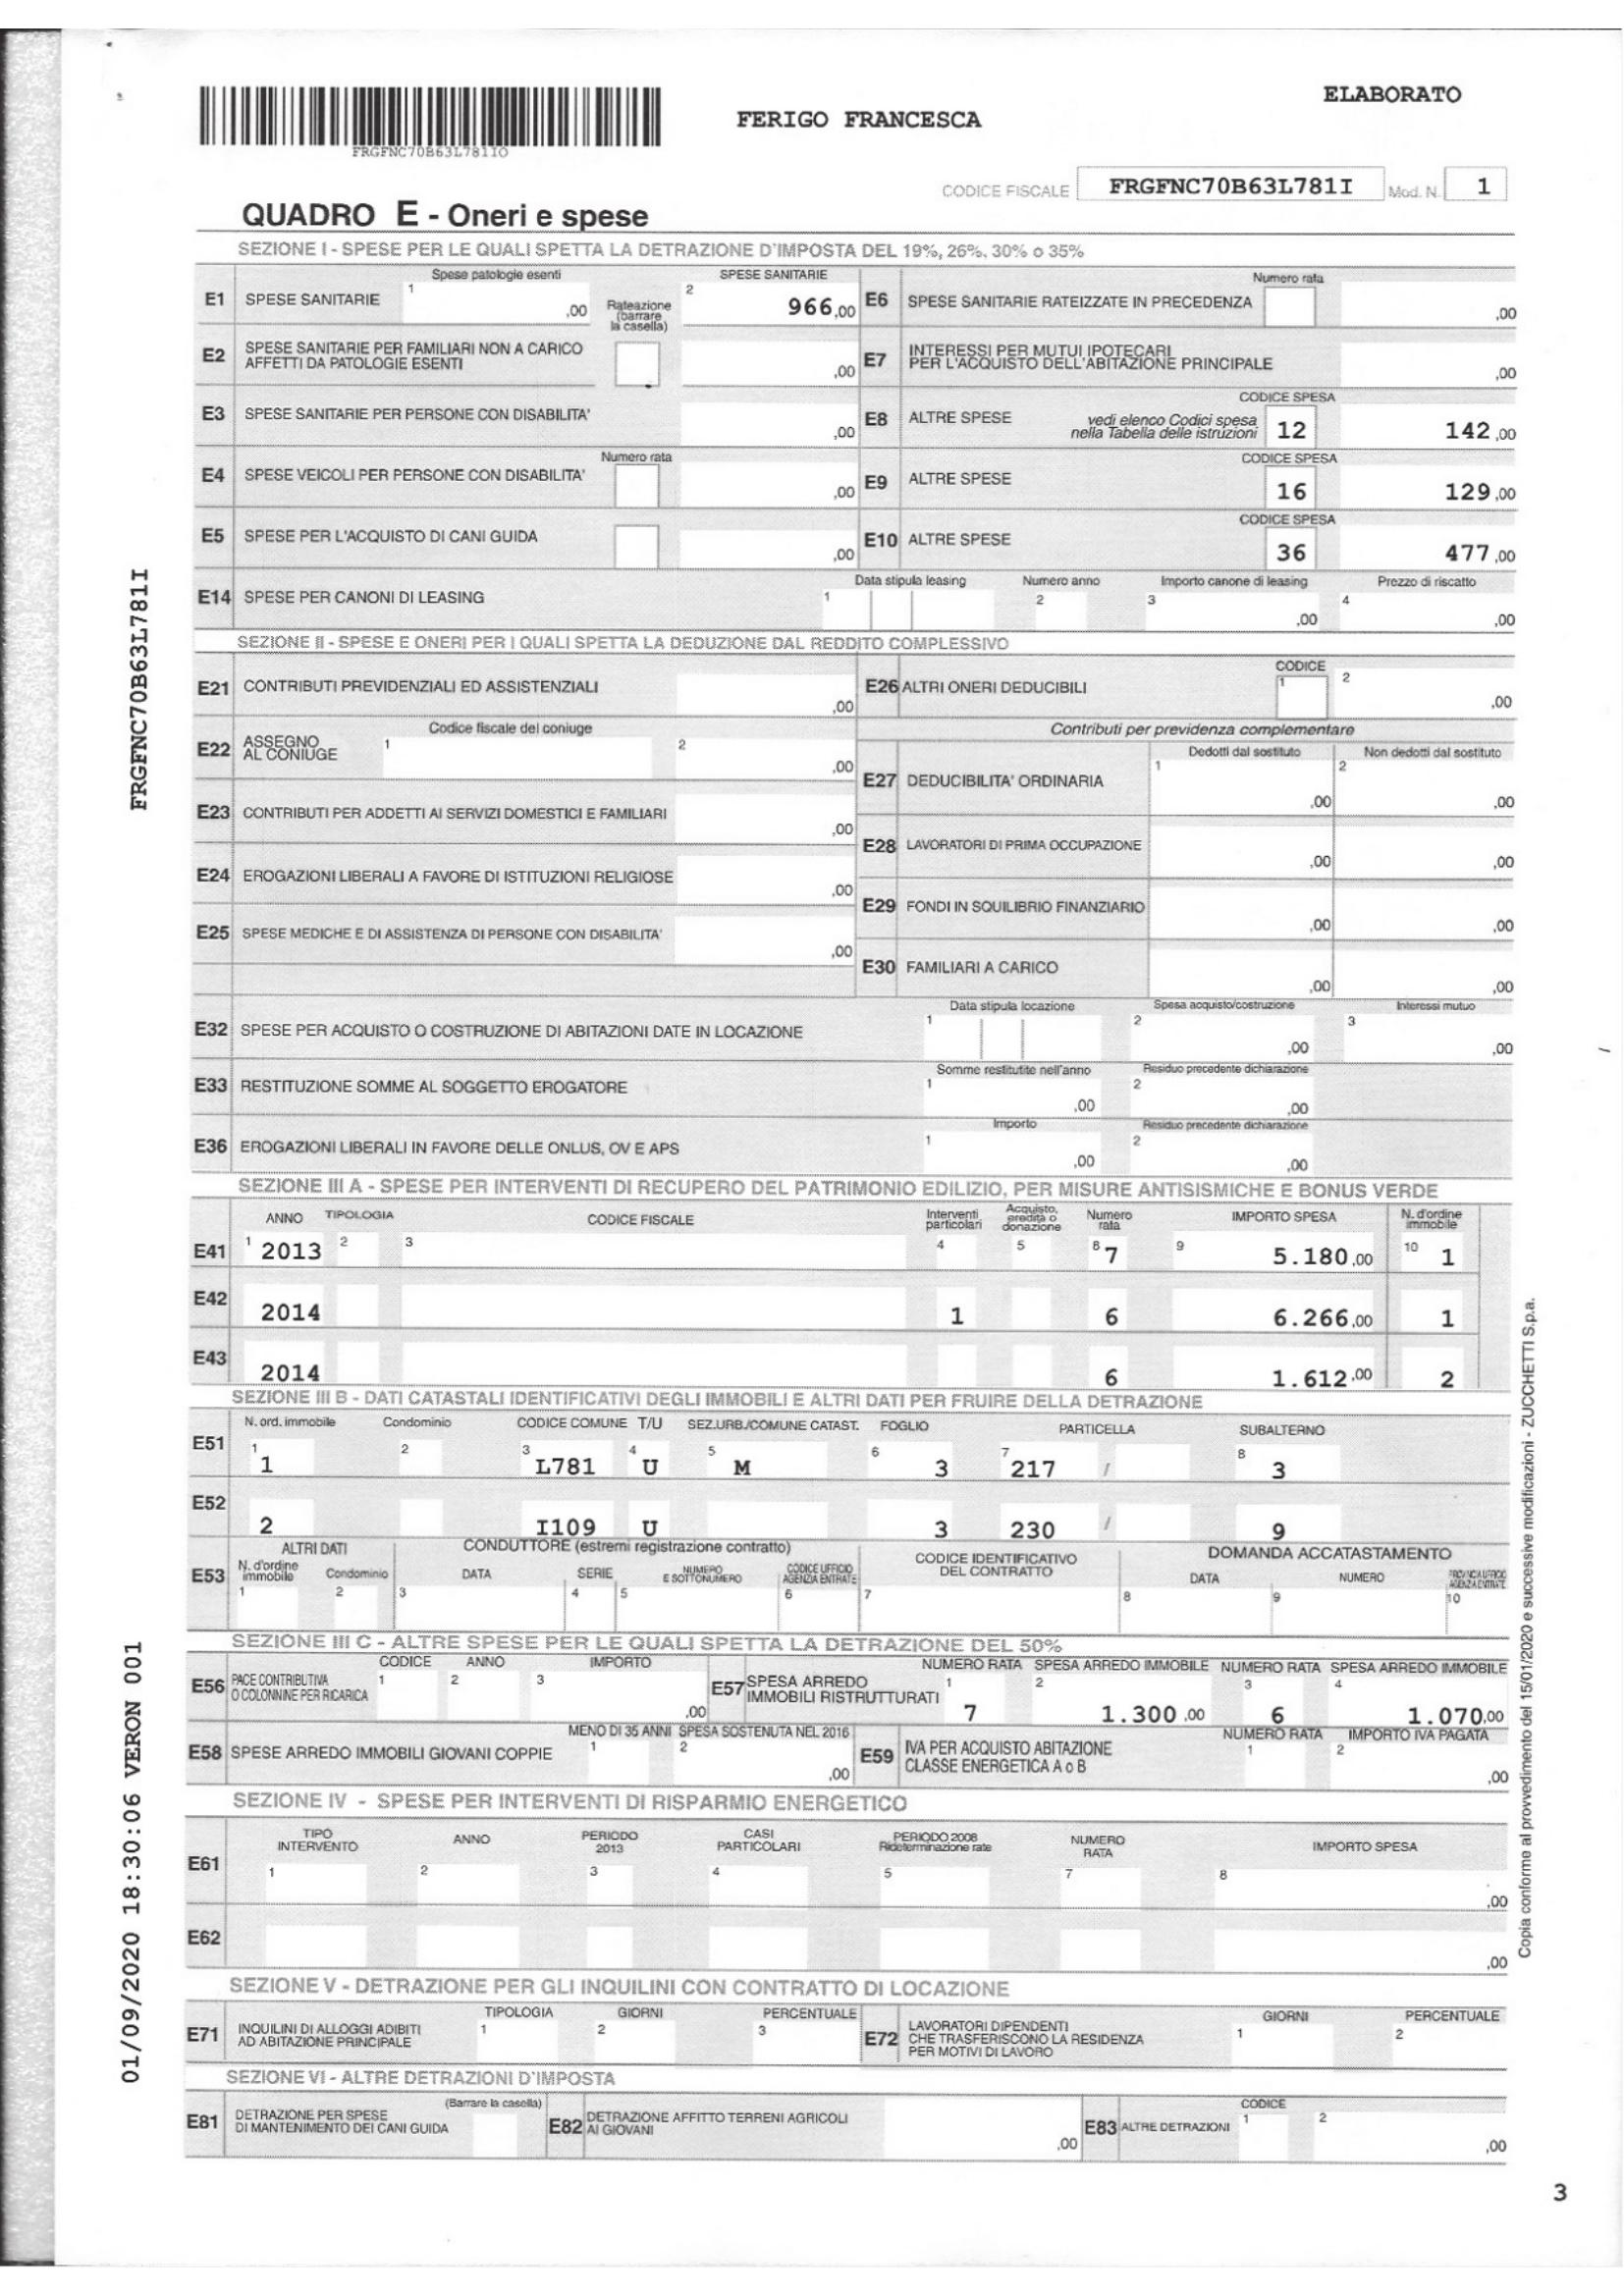

In [7]:
# Example usage:
search_text_and_visualize("QUADRO E")

🔍 Search Results:
✅ Found on Page 2



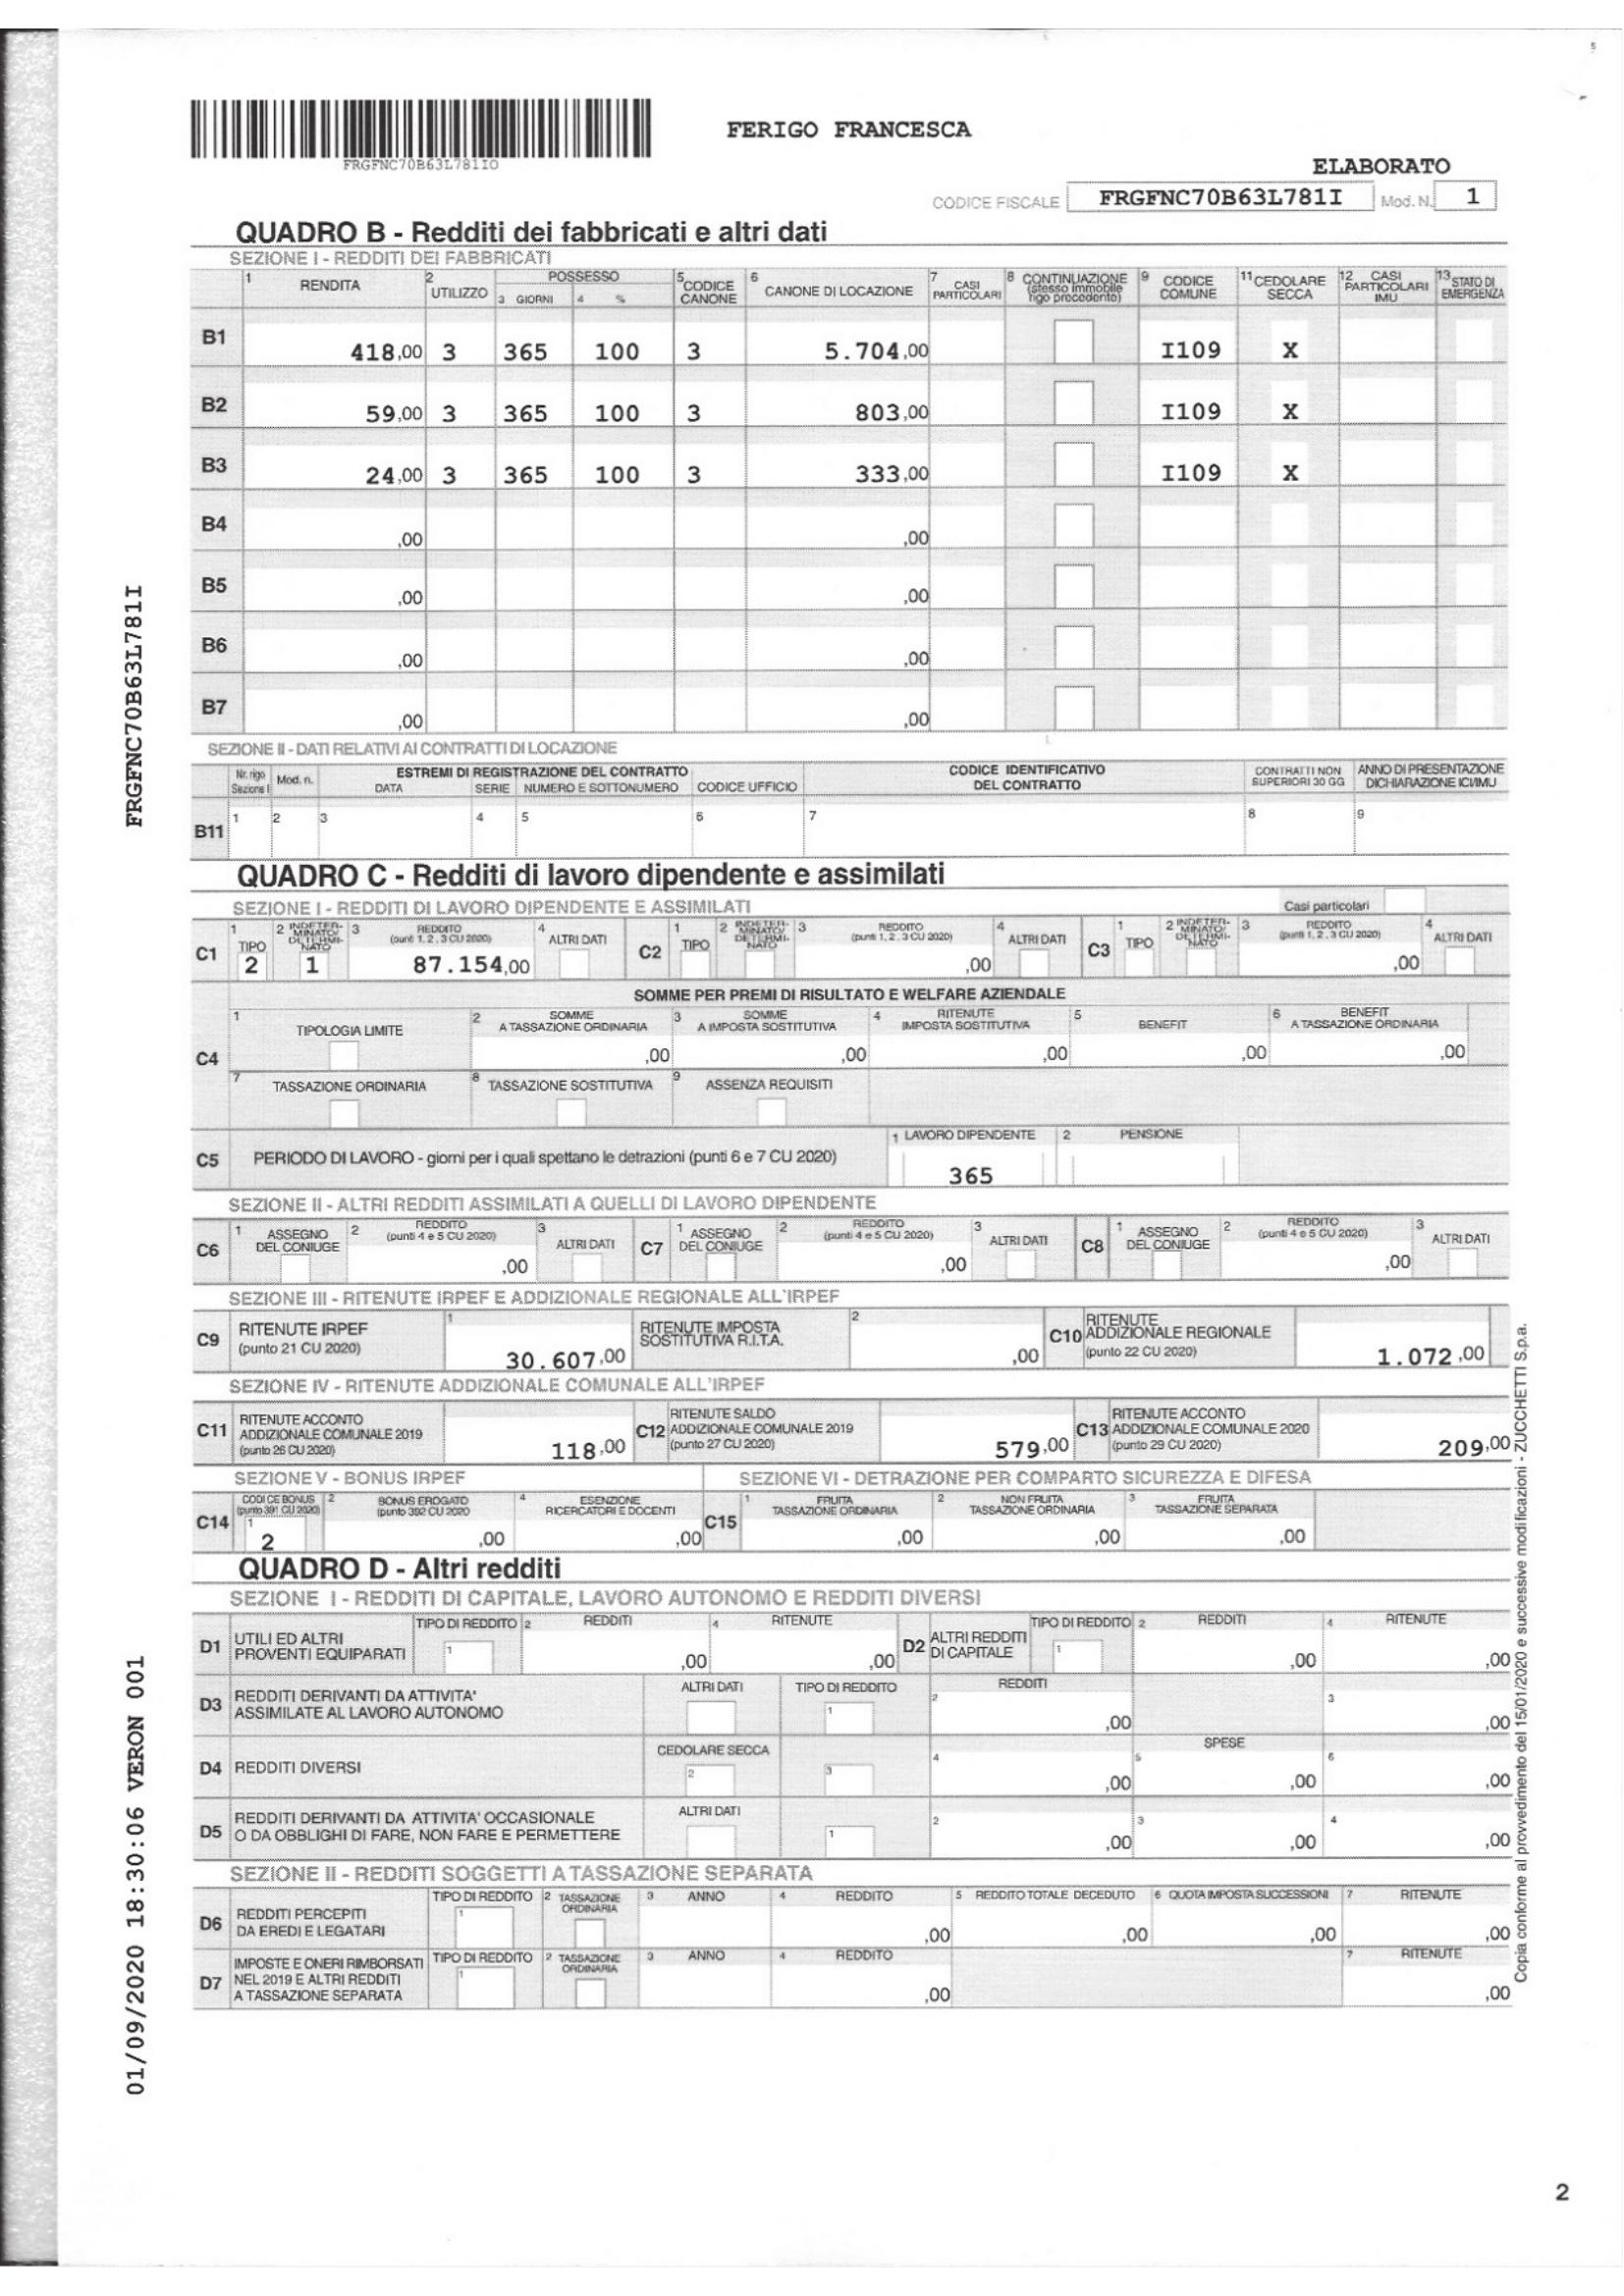

In [8]:
# Example usage:
search_text_and_visualize("altri redditi")

🔍 Search Results:
✅ Found on Page 1



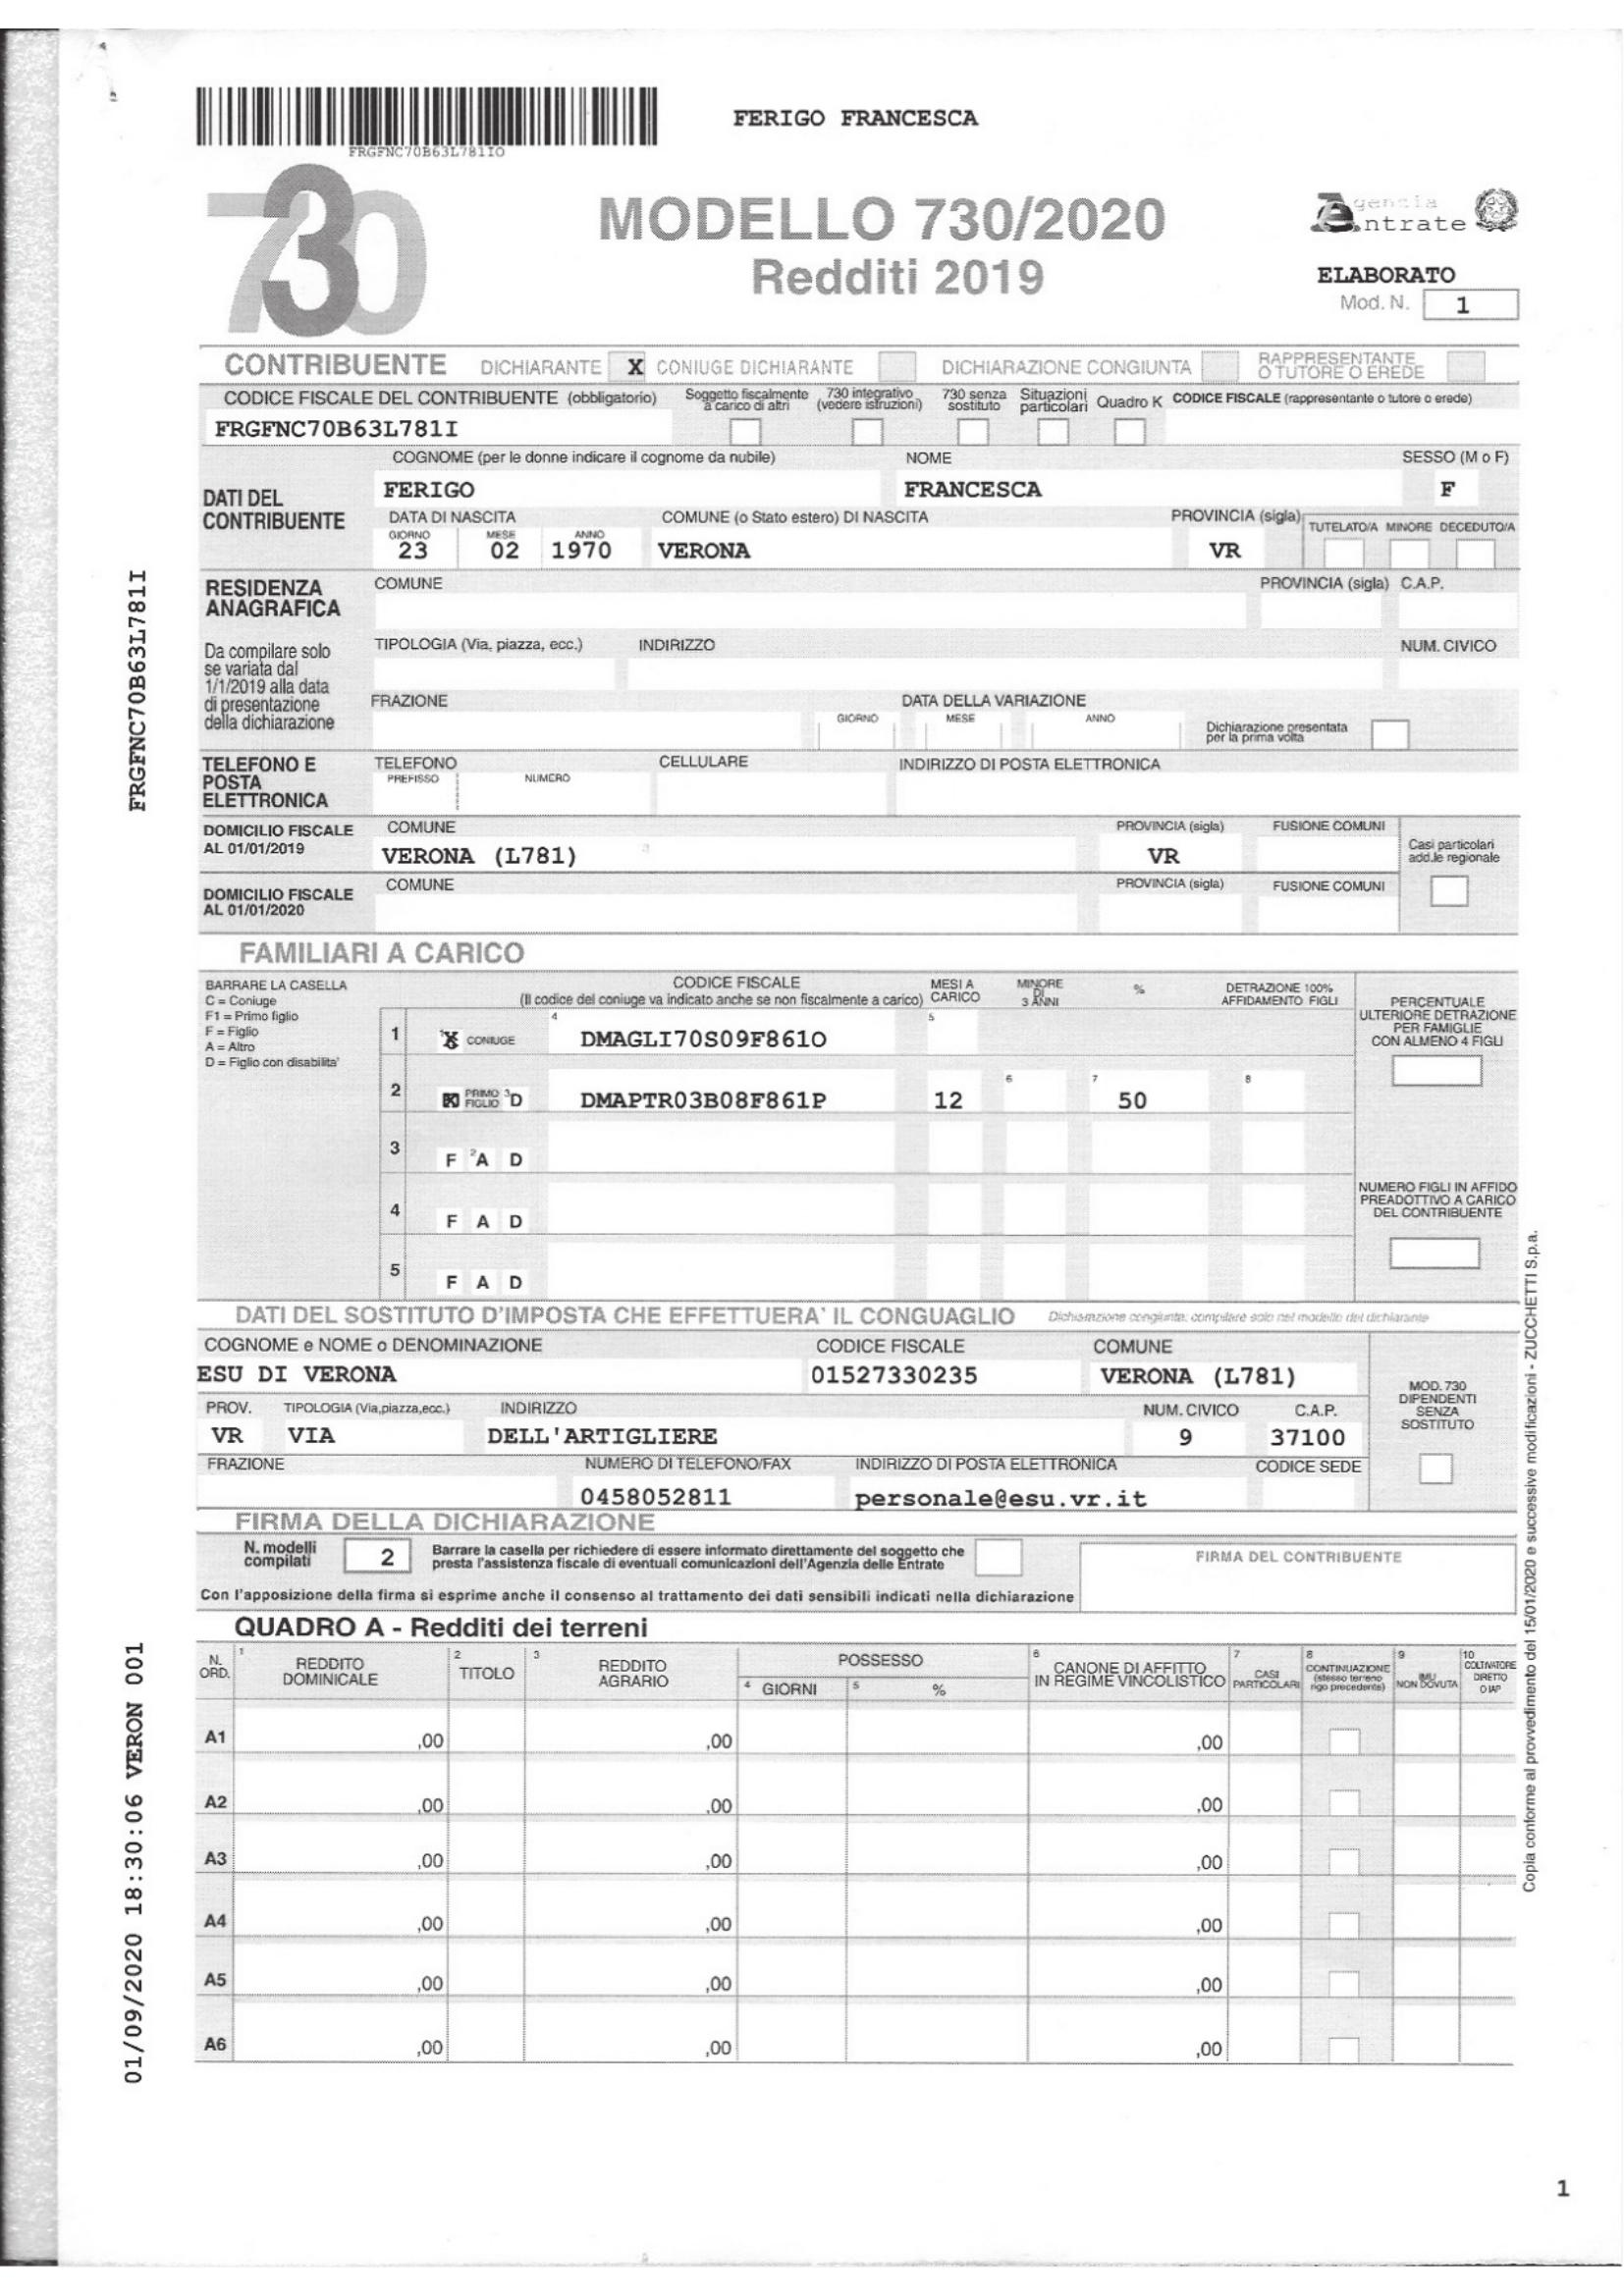

In [10]:
# Example usage:
search_text_and_visualize("personale@esu.vr.it")

### docling

In [11]:
!pip install llama-index-node-parser-docling>=0.3.0 llama-index-readers-docling>=0.3.0

In [12]:
import json
import logging
from pathlib import Path

import yaml

from docling.backend.pypdfium2_backend import PyPdfiumDocumentBackend
from docling.datamodel.base_models import InputFormat
from docling.document_converter import (
    DocumentConverter,
    PdfFormatOption,
    WordFormatOption,
)
from docling.pipeline.simple_pipeline import SimplePipeline
from docling.pipeline.standard_pdf_pipeline import StandardPdfPipeline

_log = logging.getLogger(__name__)

In [13]:
# Spanish Files
!mkdir -p data

!mv /content/modello-3page.pdf data/modello-3page.pdf

In [14]:
def main():
    input_paths = [
        Path("/content/data/modello-3page.pdf"),
    ]

    doc_converter = (
        DocumentConverter(  # all of the below is optional, has internal defaults.
            allowed_formats=[
                InputFormat.PDF,
                InputFormat.IMAGE,
                InputFormat.DOCX,
                InputFormat.HTML,
                InputFormat.PPTX,
                InputFormat.ASCIIDOC,
                InputFormat.MD,
            ],  # whitelist formats, non-matching files are ignored.
            format_options={
                InputFormat.PDF: PdfFormatOption(
                    pipeline_cls=StandardPdfPipeline, backend=PyPdfiumDocumentBackend
                ),
                InputFormat.DOCX: WordFormatOption(
                    pipeline_cls=SimplePipeline  # , backend=MsWordDocumentBackend
                ),
            },
        )
    )

    conv_results = doc_converter.convert_all(input_paths)

    for res in conv_results:
        out_path = Path("scratch")
        out_path.mkdir(parents=True, exist_ok=True)
        print(
            f"Document {res.input.file.name} converted."
            f"\nSaved markdown output to: {str(out_path)}"
        )
        _log.debug(res.document._export_to_indented_text(max_text_len=16))
        # Export Docling document format to markdowndoc:
        with (out_path / f"{res.input.file.stem}.md").open("w", encoding="utf-8") as fp:
            fp.write(res.document.export_to_markdown())

        with (out_path / f"{res.input.file.stem}.json").open("w", encoding="utf-8") as fp: # Specify 'utf-8' encoding to handle Unicode characters
            fp.write(json.dumps(res.document.export_to_dict()))

        with (out_path / f"{res.input.file.stem}.yaml").open("w", encoding="utf-8") as fp: # Specify 'utf-8' encoding to handle Unicode characters
            fp.write(yaml.safe_dump(res.document.export_to_dict()))

In [15]:
if __name__ == "__main__":
    main()

Document modello-3page.pdf converted.
Saved markdown output to: scratch


In [16]:
with open('/content/scratch/modello-3page.md', 'r', encoding='utf-8') as f:
    print(f.read())

## 8 ;

Figlio

<!-- image -->

<!-- image -->

CONTRIBUENTE

## MODELLO 730/2020 Redditi 2019

DICHIARANTE

DICHIARAZIONE CONGIUNTA

CODICE FISCALE DEL CONTRIBUENTE (obbligatorio)

FRGFNC7OB63L781I

COGNOME (per le donne indicare 1 cognome ca nubile)

NOME

SESSO (Mo F)

FERIGO

FRANCESCA

DATA DI NASCITA

23

02

1970

VERONA

VR

COMUNE

PROVINCIA (sigla)

CAP

TIPOLCGIA (Viz, piazza,

FRAZIONE

DATA DELLA VARIAZIONE

Vese

COMUNE (0 Siato estero) DI NASCITA

PAOVINCIA (sigla)r

DATI DEL CONTRIBUENTE

RESIDENZA ANAGRAFICA

Da compilare solo se variata dal Cella dichiarazione

TELEFONO E POSTA ELETTRONICA

DOMICILIO FISCALE AL 01/01/2019

DOMICILIO FISCALE AL 01/01/2020

CELLULARE

InDIRIZZO DI POSTA ELETTRONICA

COMUNE

VERONA (1781)

COMUNE

FUSIONE COMUNI

FAMILIARI A CARICO

BARRAAE LA CASELLA

C =

Coniuge

Fi=Primo liglio

4=Altro

DEL CONTRIBUENTE

<!-- image -->

SENZA

VR

Mesi

2

A

D

DATI DEL SOSTITUTO D'IMPOSTA CHE EFFETTUERA IL CONGUAGLIO

COGNOME e NOME 0 DENOMINAZION

### marker

In [ ]:
pip install marker-pdf

In [3]:
!marker_single /content/modello3page.pdf --output_dir /content/modello

2025-02-04 16:14:15.638273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738685655.934862    2079 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738685656.010362    2079 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 16:14:16.600796: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
config.json: 100% 6.01k/6.01k [00:00<00:00, 22.8MB/s]
model.safetensors: 100% 253M/253M [00:05<00:00, 42.3MB/s]
Loaded layout

## Notes:

image example:
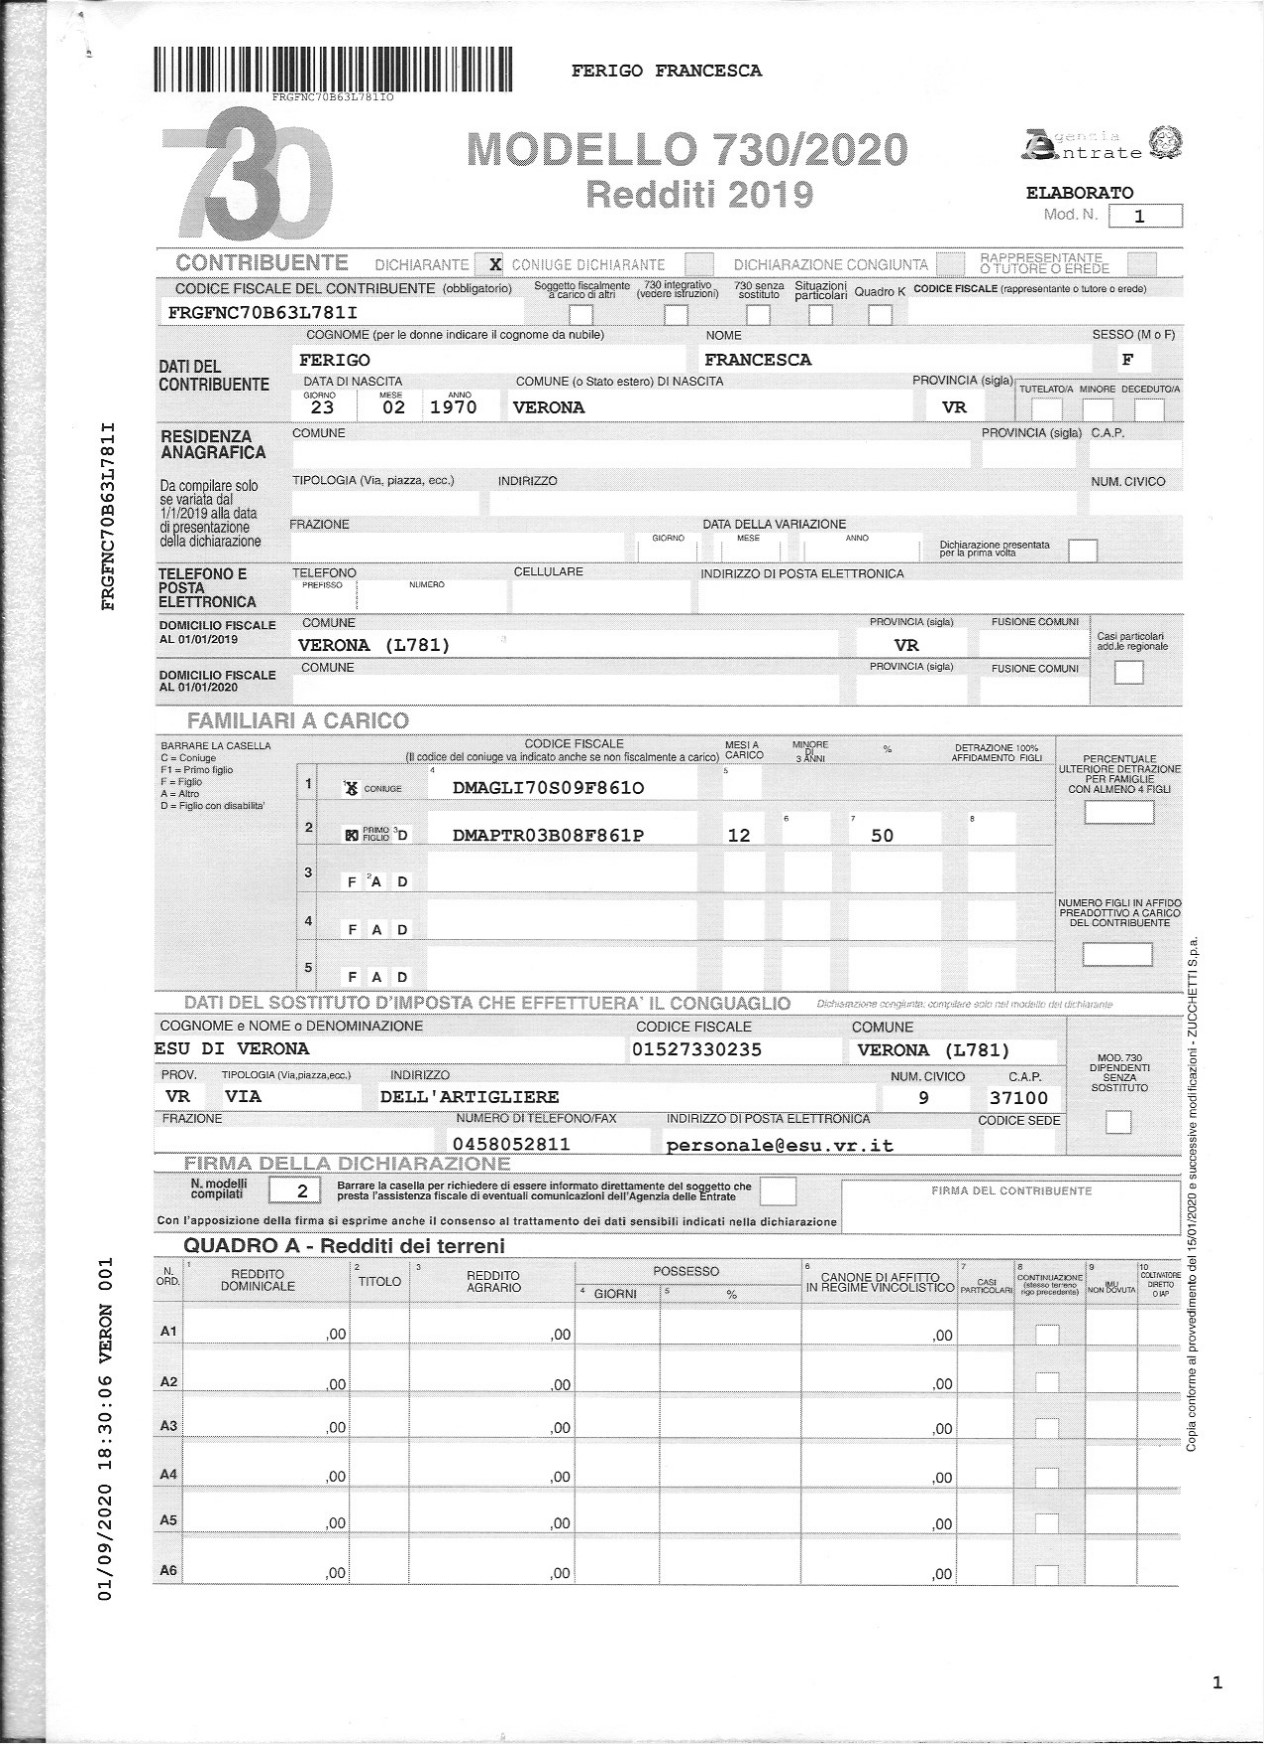
in the scanned documents page (pdf format) with complex layout, using LM takes a lot of resource, time, and no guarantee that the result were true/no hallucination. Based on this problem, i recommend to process this kind of document using deep learning model for OCR (Yolo OCR) to extract the text. This model can differentiate between "I" and "1" which others model may be difficult in this task, take the email format with "@" correctly, and so on. The nect practice after the result maybe store the data text with reference of pages, and when the query keyword match the text, it will call the page and show them. For this task, maybe need more effort for the user to read the related document to find the information needed.



*   **yolo ocr** takes only 1 minutes for processing scanned images
*   docling takes 8-10 minutes using cpu -> bad result
*   marker takes more than 1 hour  using cpu -> unknown